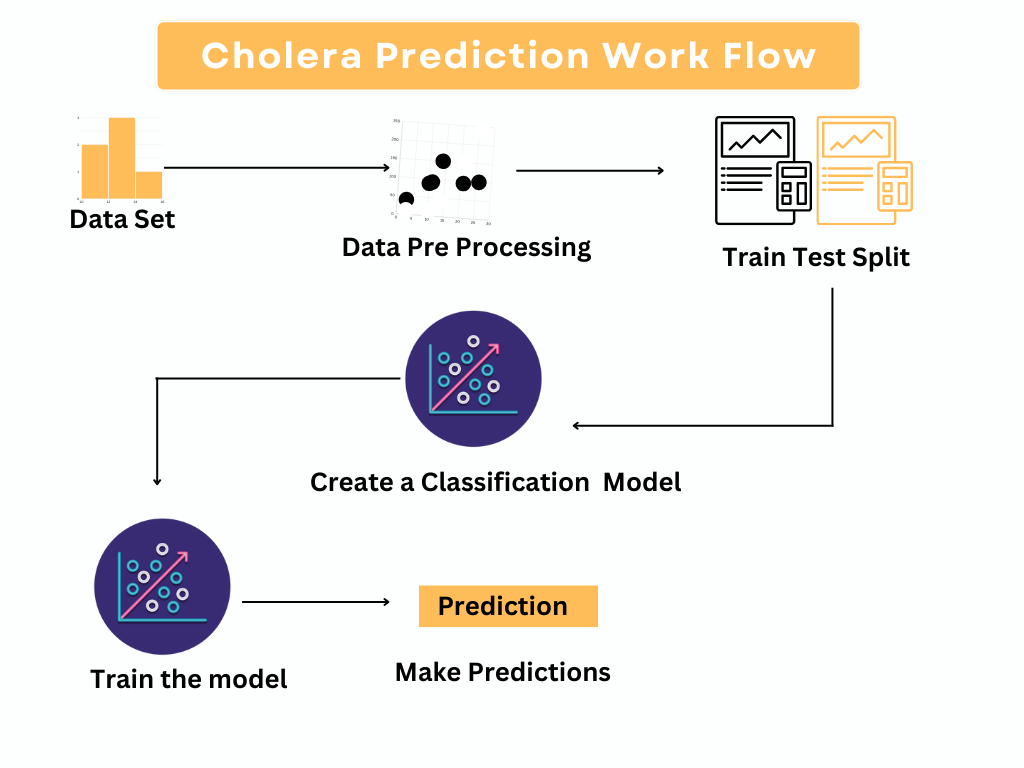

In [105]:
from IPython.display import Image

# Provide the file path to your image
Image(filename="C:/Users/Yusuf Nasir/OneDrive/Desktop/Zakiya/Cholera Prediction Work Flow.png")


# Importing Dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Reading the cholera Dataset as input

In [5]:
file = pd.read_csv(r'C:\Users\Yusuf Nasir\OneDrive\Desktop\Zakiya\data.csv')
file.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean


# IDENTIFYING THE DATA TYPE

In [6]:
file.dtypes

Country                                   object
Year                                       int64
Number of reported cases of cholera       object
Number of reported deaths from cholera    object
Cholera case fatality rate                object
WHO Region                                object
dtype: object

# IDENTIFYING DATA GAPS

In [7]:
file.isnull().sum()

Country                                     0
Year                                        0
Number of reported cases of cholera        22
Number of reported deaths from cholera    117
Cholera case fatality rate                127
WHO Region                                  0
dtype: int64

# DATA CLEANING 

In [8]:
file.replace(np.nan,0,regex=True,inplace=True)

#  DATA CLEAN CHECK

In [9]:
file.isnull().sum()

Country                                   0
Year                                      0
Number of reported cases of cholera       0
Number of reported deaths from cholera    0
Cholera case fatality rate                0
WHO Region                                0
dtype: int64

# CHECKING IF UNKNOWN VALUES EXISTS

In [10]:
file[(file['Number of reported deaths from cholera']=='Unknown') | (file['Number of reported cases of cholera']=='Unknown')]

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
761,Germany,2016,1,Unknown,Unknown,Europe


# CORRECTING THE UNKNOWN VALUES

In [11]:
file.replace('Unknown',0,regex=True,inplace=True)

# IDENTIFYING THE TOTAL NUMBER OF COUNTRIES IN THE DATA SET

In [12]:
country_list=file.Country.unique()
len(file.Country.unique())

162

# Upon checking the data, I observed an issue with this particular entry

In [13]:
file[file['Number of reported cases of cholera']=="3 5"]

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
1059,Iraq,2016,3 5,0 0,0.0 0.0,Eastern Mediterranean


# This entry needs to be cleaned. Since the fatality rate is given as 0.0 and 0.0, we assume, that all the entries here to be 0 and assign the variables accordingly.

In [14]:
file['Number of reported cases of cholera'] = file['Number of reported cases of cholera'].str.replace('3 5','0')
file['Number of reported deaths from cholera'] = file['Number of reported deaths from cholera'].str.replace('0 0','0')
file['Cholera case fatality rate'] = file['Cholera case fatality rate'].str.replace('0.0 0.0','0')

# Country wise visualization of Total Number of Reported Cases and Total Number of Deaths over the Years

In [55]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Your existing code follows
y11 = file_req.groupby('Year').apply(lambda x: np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Counts')
y21 = file_req.groupby('Year').apply(lambda x: np.sum(pd.to_numeric(x['Number of reported deaths from cholera']))).reset_index(name='Counts')


# WHO Region wise visualization of Total Number of Reported Cases and Total Number of Deaths over the Years

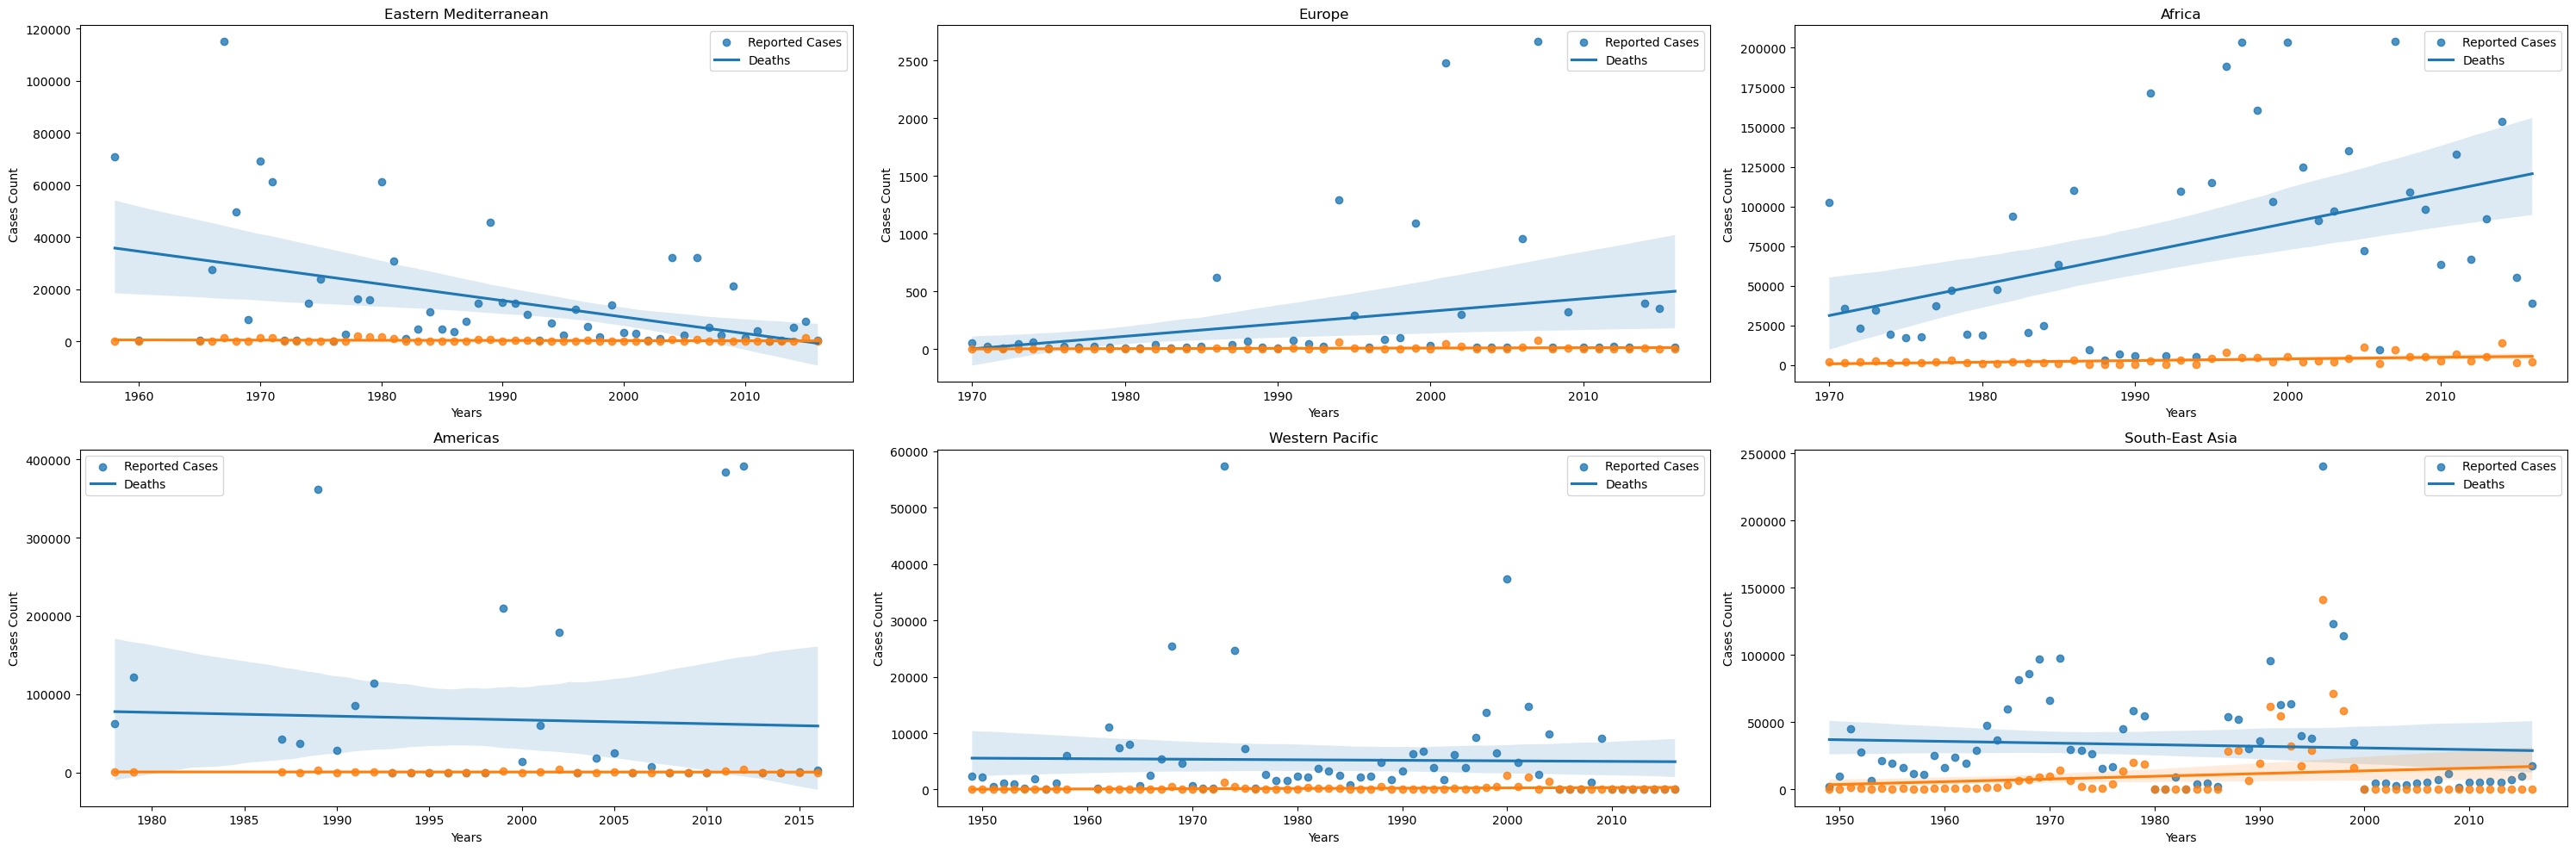

In [56]:
fig = plt.figure(figsize=(30,10))
for c, num in zip(file['WHO Region'].unique(), np.arange(1, 1 + len(file['WHO Region'].unique()))):
    file_req = file[file['WHO Region'] == c]
    ax = fig.add_subplot(2, 3, num)
    x = file_req['Year'].unique()
    
    # Summing reported cases and plotting
    y11 = file_req.groupby('Year').apply(lambda x: np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Counts')
    y1 = y11['Counts']
    sns.regplot(x=x, y=y1)  # Fixed here
    
    # Summing reported deaths and plotting
    y21 = file_req.groupby('Year').apply(lambda x: np.sum(pd.to_numeric(x['Number of reported deaths from cholera']))).reset_index(name='Counts')
    y2 = y21['Counts']
    sns.regplot(x=x, y=y2)  # Fixed here
    
    ax.legend(['Reported Cases', 'Deaths'])
    ax.set_title(c)
    ax.set_xlabel('Years')
    ax.set_ylabel('Cases Count')

plt.tight_layout()
plt.show()


# 

# To identify the number of Cases Registered in the World (All time data)

The Number of Cholera Cases for the counties:
                                 Country  Count of Cholera Cases
0                           Afghanistan                263843.0
1                               Albania                   626.0
2                               Algeria                 12729.0
3                               Andorra                     0.0
4                                Angola                191036.0
..                                  ...                     ...
157  Venezuela (Bolivarian Republic of)                  6969.0
158                            Viet Nam                 73128.0
159                               Yemen                 52462.0
160                              Zambia                 97606.0
161                            Zimbabwe                153428.0

[162 rows x 2 columns]


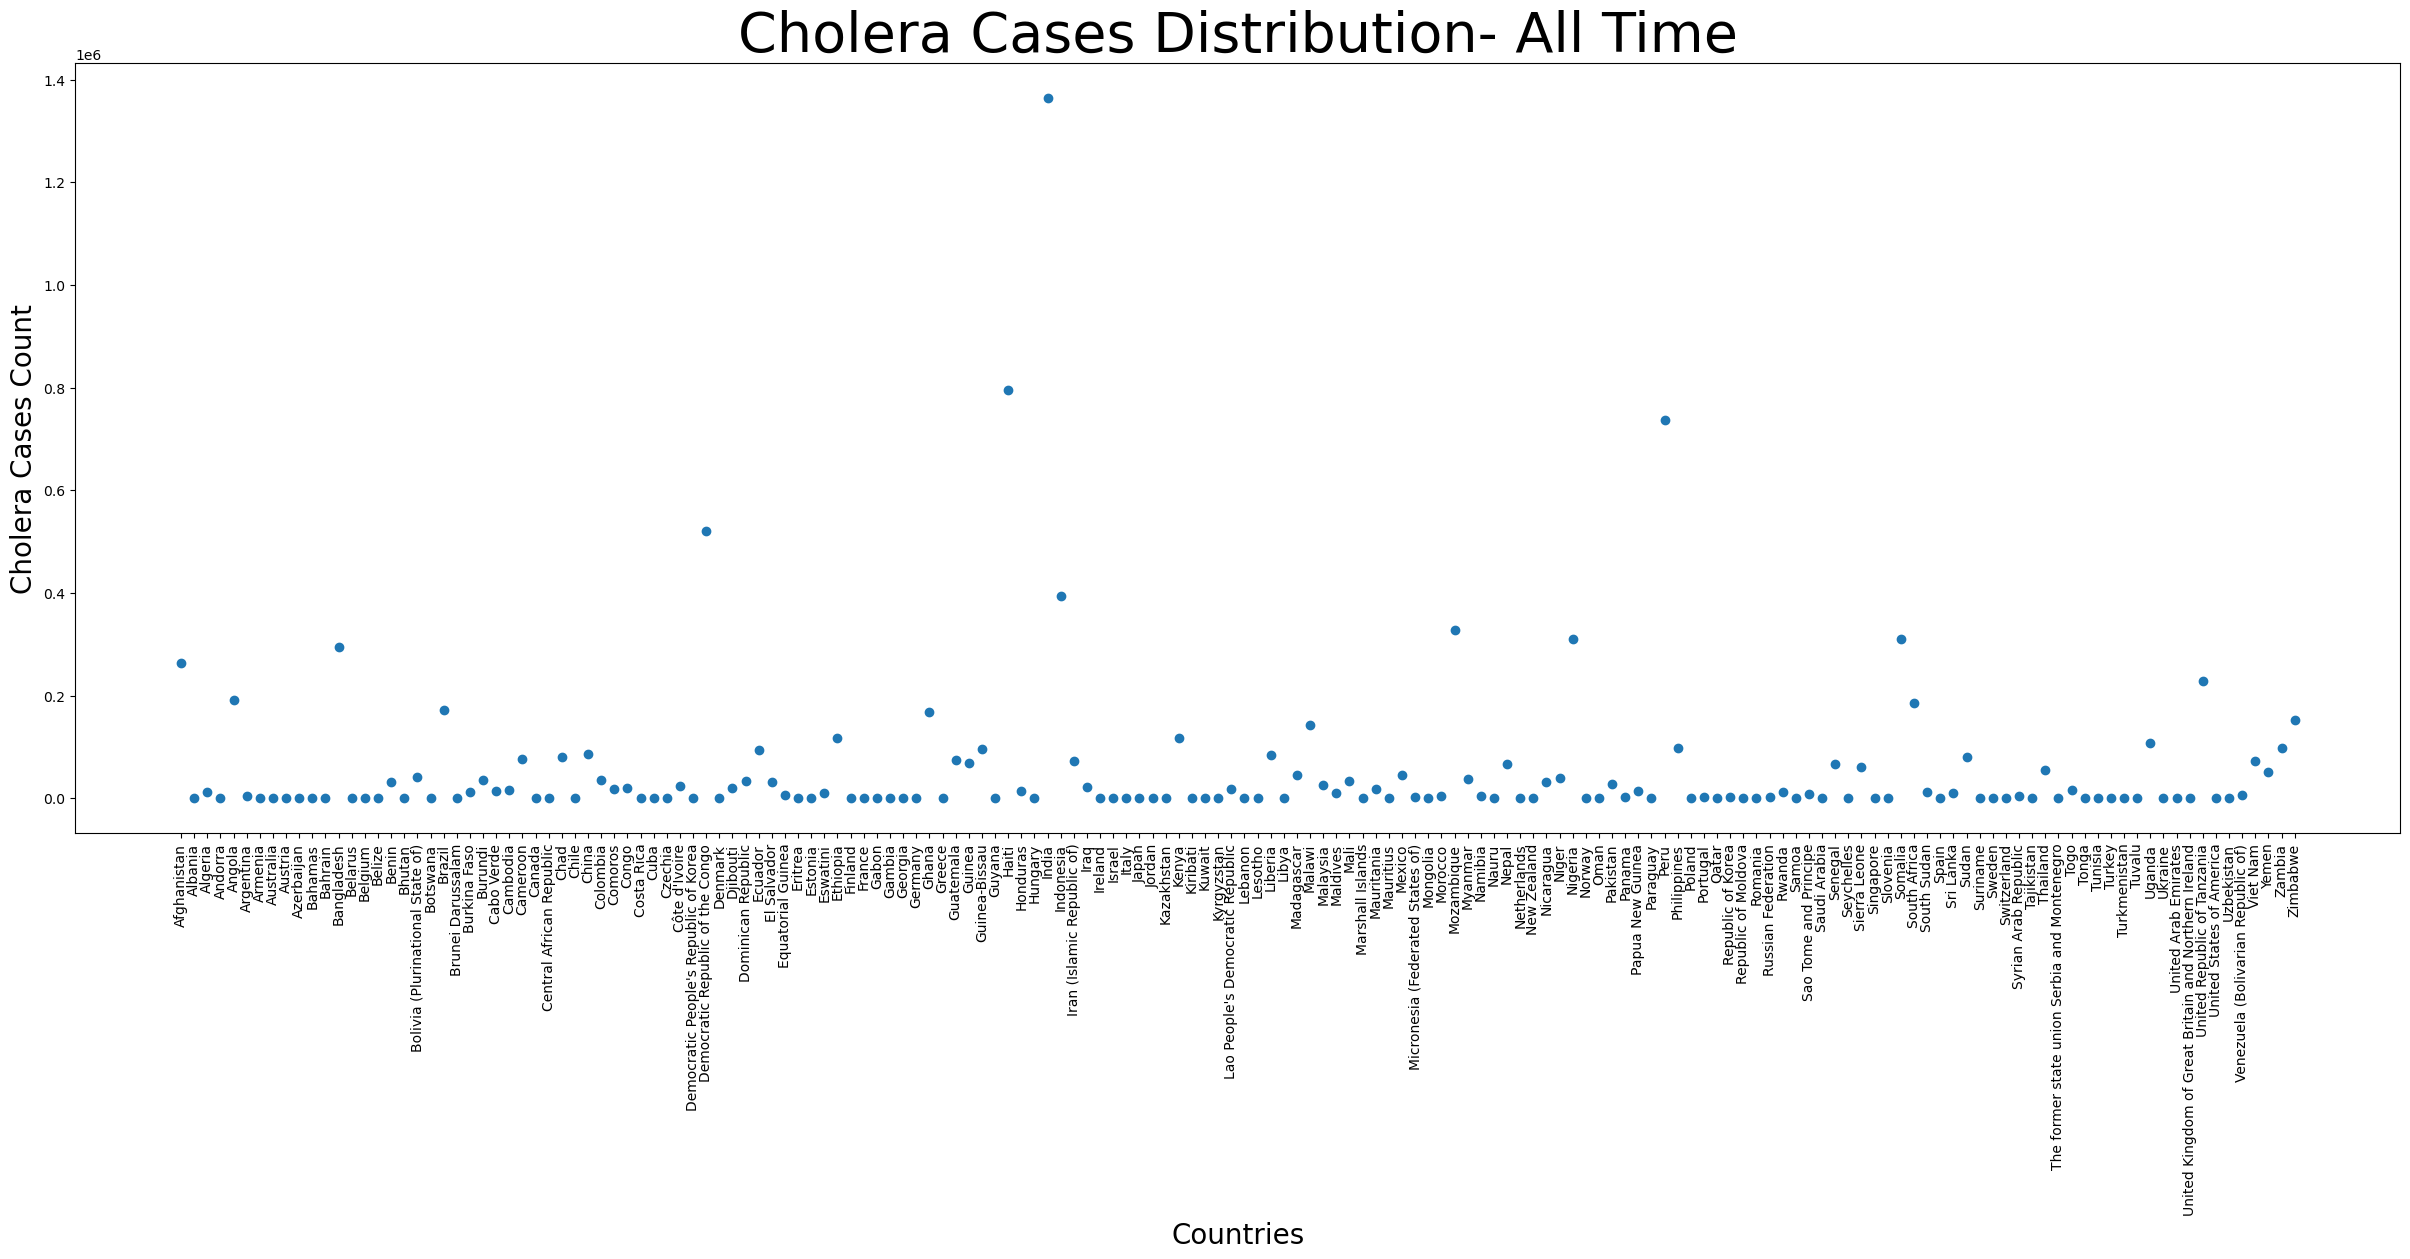

In [57]:
file_ctry=file.groupby(['Country']).apply(lambda x:np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Count of Cholera Cases')
print('The Number of Cholera Cases for the counties:\n',file_ctry)
plt.figure(figsize=(30,10))
plt.scatter(file_ctry['Country'],file_ctry['Count of Cholera Cases'])
plt.xlabel('Countries',size=20)
plt.ylabel('Cholera Cases Count',size=20)
plt.title('Cholera Cases Distribution- All Time',size=40)
plt.xticks(rotation=90)
plt.show()

# Importing a shape file, that will be required for the plotting of the Global Heatmap

In [33]:
import geopandas as gpd

# Correct file path (using raw string literal)
fp = r"C:\Users\Yusuf Nasir\OneDrive\Desktop\Zakiya\TM_WORLD_BORDERS-0.3.shp"

# Read the shapefile
map_df = gpd.read_file(fp)

# Display the GeoDataFrame
print(map_df.head())


  FIPS ISO2 ISO3  UN                 NAME    AREA   POP2005  REGION  \
0   AC   AG  ATG  28  Antigua and Barbuda      44     83039      19   
1   AG   DZ  DZA  12              Algeria  238174  32854159       2   
2   AJ   AZ  AZE  31           Azerbaijan    8260   8352021     142   
3   AL   AL  ALB   8              Albania    2740   3153731     150   
4   AM   AM  ARM  51              Armenia    2820   3017661     142   

   SUBREGION     LON     LAT  \
0         29 -61.783  17.078   
1         15   2.632  28.163   
2        145  47.395  40.430   
3         39  20.068  41.143   
4        145  44.563  40.534   

                                            geometry  
0  MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...  
1  POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...  
2  MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...  
3  POLYGON ((19.43621 41.02106, 19.45055 41.06, 1...  
4  MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...  


# The Countries in the .shp file needs to be the same as the Country name in the data file. Identifying those countries and replacing their names.

In [35]:
print(map_df.columns)


Index(['FIPS', 'ISO2', 'ISO3', 'UN', 'NAME', 'AREA', 'POP2005', 'REGION',
       'SUBREGION', 'LON', 'LAT', 'geometry'],
      dtype='object')


In [36]:
map_df.NAME.replace({'Burma':'Myanmar'},regex=True,inplace=True)
map_df.NAME.replace({'Korea, Republic of':'Republic of Korea'},regex=True,inplace=True)
map_df.NAME.replace({'Russia':'Russian Federation'},regex=True,inplace=True)
map_df.NAME.replace({'United Kingdom':'United Kingdom of Great Britain and Northern Ireland'},regex=True,inplace=True)
map_df.NAME.replace({'United States':'United States of America'},regex=True,inplace=True)
map_df.NAME.replace({ 'Venezuela': 'Venezuela (Bolivarian Republic of)'},regex=True,inplace=True)

# Creating a World Heat Map to display the total number of cases

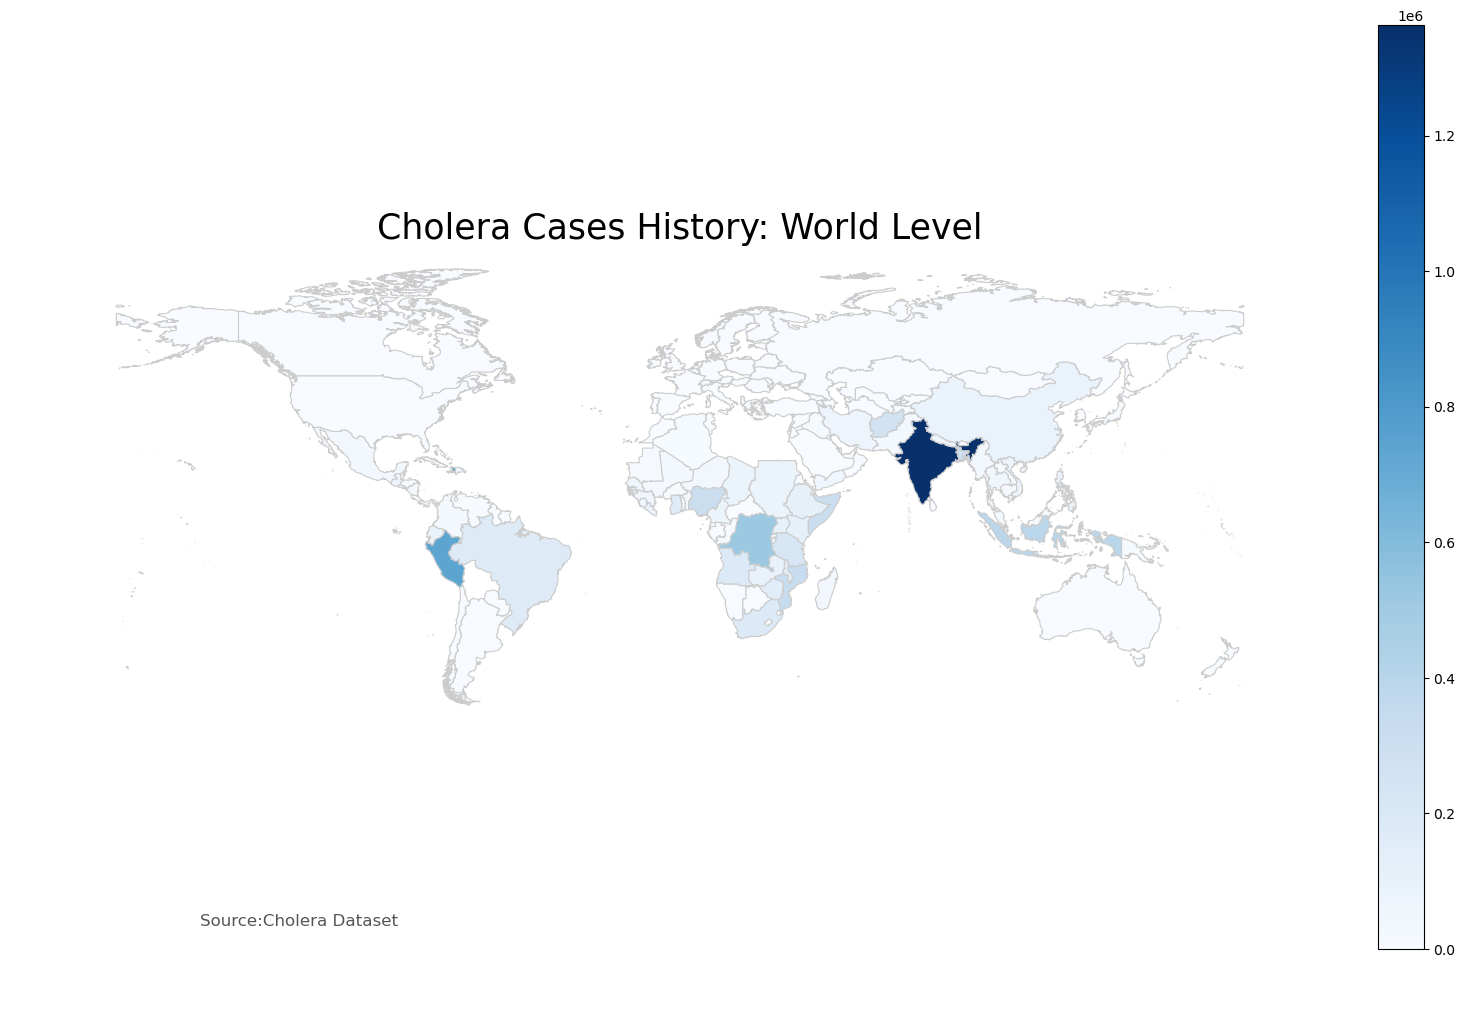

In [58]:
merged = map_df.set_index('NAME').join(file_ctry.set_index('Country'))
variable = 'Count of Cholera Cases'
vmin, vmax = np.min(merged['Count of Cholera Cases']), np.max(merged['Count of Cholera Cases'])

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Cholera Cases History: World Level', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


# 

# To identify the span of last 10 years from the dataset

In [39]:
file_yrs=file.Year.unique()
file_yrs.sort()
final_10_yrs=file_yrs[-10:]
final_10_yrs

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

# Countries with the Least number of Cases in the past 10 years

In [59]:
ten_yr_case=file[file['Year'].isin(final_10_yrs)]
file_yr_ctry=ten_yr_case.groupby(['Country']).apply(lambda x:np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Count of Cholera Cases')
best_cases_country=file_yr_ctry.sort_values(by='Count of Cholera Cases',ascending=True)[0:10]
print('Countries having the least number of Cholera Cases in the last 10 years: \n',best_cases_country)

Countries having the least number of Cholera Cases in the last 10 years: 
         Country  Count of Cholera Cases
76     Slovenia                     0.0
45   Kazakhstan                     1.0
42       Israel                     1.0
7        Brazil                     1.0
63         Oman                     1.0
29      Finland                     1.0
31        Gabon                     2.0
3       Bahamas                     2.0
62       Norway                     2.0
83  Switzerland                     2.0


# Plotting the Countries with the Least Number of Cases in the Last 10 Years

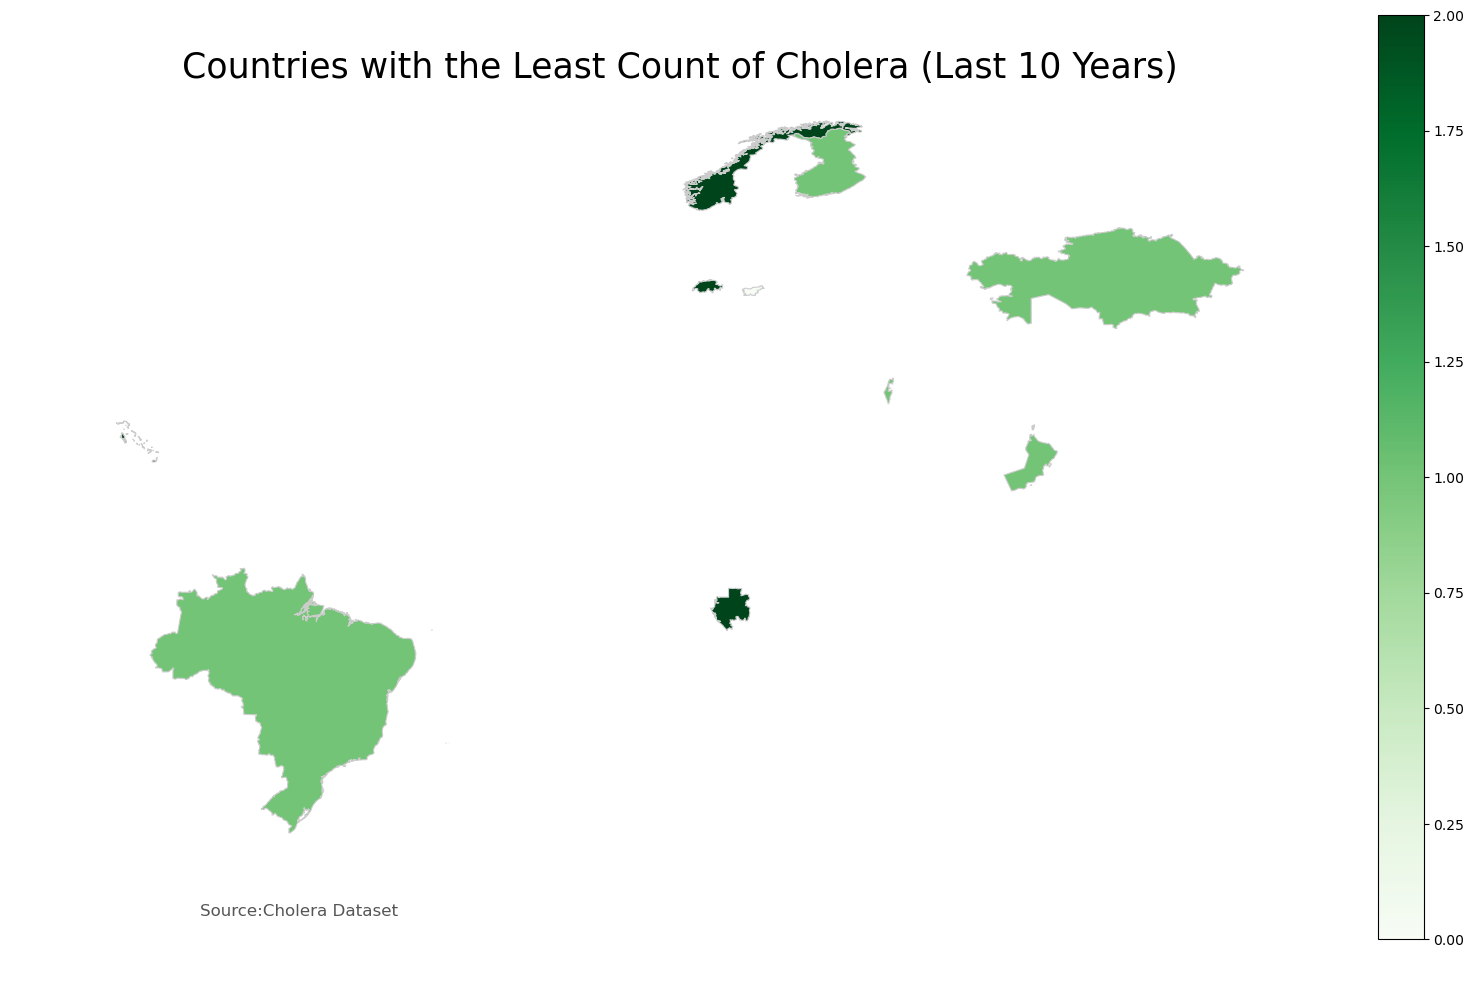

In [60]:
merged = map_df.set_index('NAME').join(best_cases_country.set_index('Country'))
variable = 'Count of Cholera Cases'
vmin, vmax = np.min(merged['Count of Cholera Cases']), np.max(merged['Count of Cholera Cases'])

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Countries with the Least Count of Cholera (Last 10 Years)', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


# List of Countries with the Maximum number of cases in the past 10 Years

In [42]:
worst_cases_country=file_yr_ctry.sort_values(by='Count of Cholera Cases',ascending=False)[0:10]
print('Countries having the most number of Cholera Cases in the last 10 years: \n',worst_cases_country)

Countries having the most number of Cholera Cases in the last 10 years: 
                              Country  Count of Cholera Cases
37                             Haiti                795794.0
22  Democratic Republic of the Congo                246985.0
77                           Somalia                179693.0
61                           Nigeria                137846.0
95                          Zimbabwe                130537.0
0                        Afghanistan                119339.0
28                          Ethiopia                 61174.0
34                             Ghana                 53171.0
55                        Mozambique                 52715.0
93                             Yemen                 47895.0


# Plotting the Countries with the Maximum number of Cases in the last 10 Years

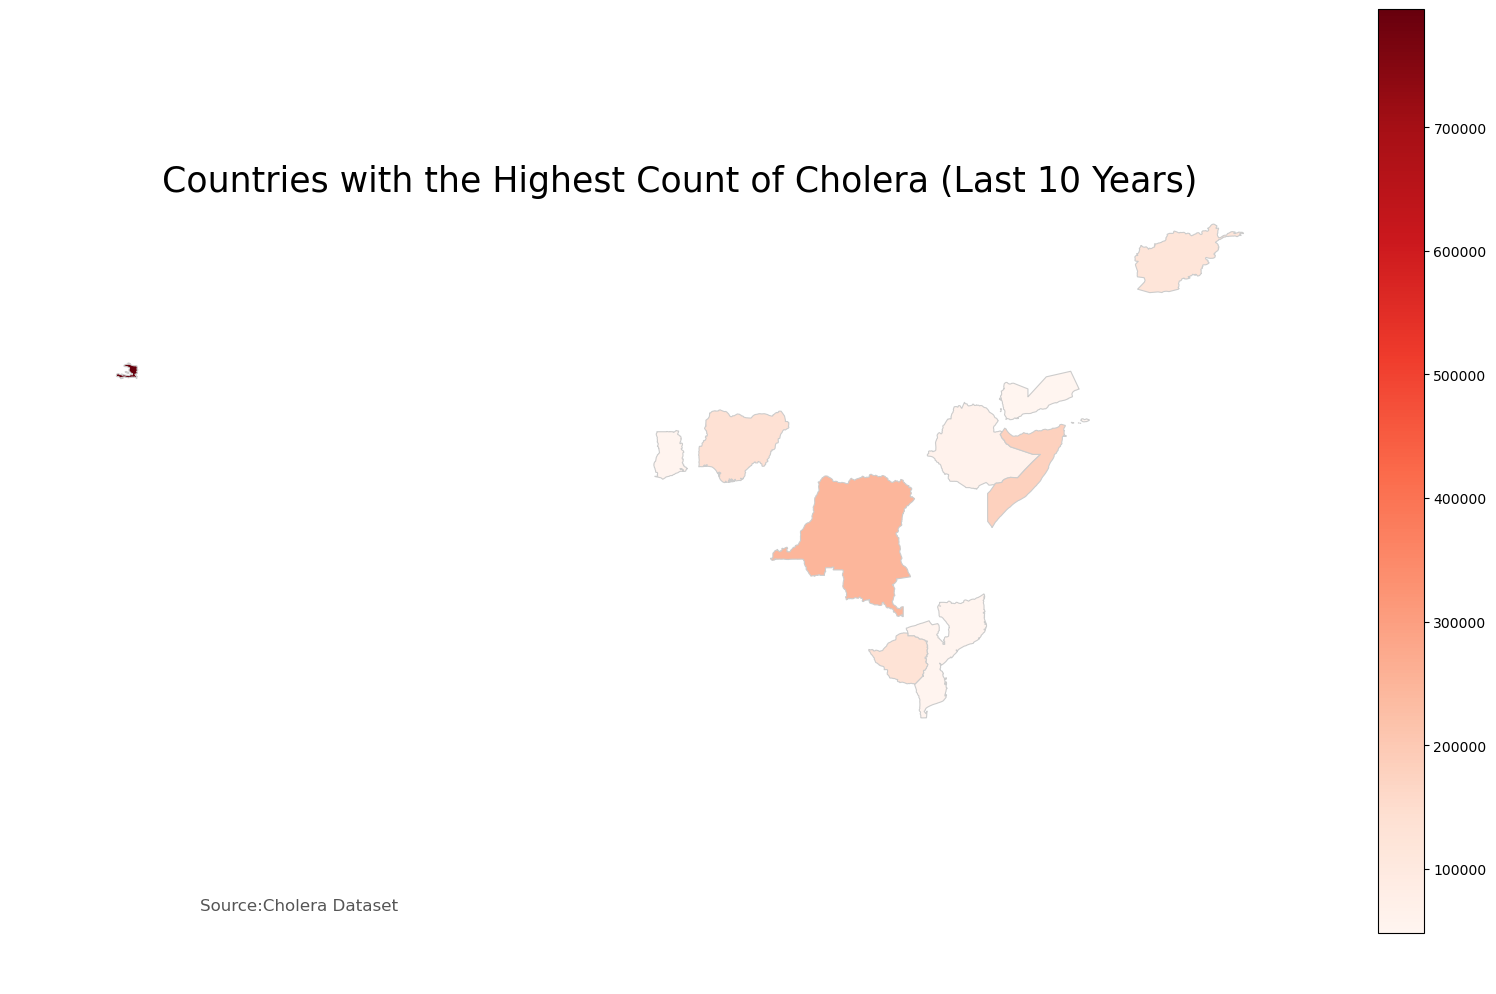

In [61]:
merged = map_df.set_index('NAME').join(worst_cases_country.set_index('Country'))
variable = 'Count of Cholera Cases'
vmin, vmax = np.min(merged['Count of Cholera Cases']), np.max(merged['Count of Cholera Cases'])

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Countries with the Highest Count of Cholera (Last 10 Years)', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


# Countries Level Analysis- Deaths from Cholera (All Time)

The Number of Cholera Cases for the counties:
                                 Country  Count of Deaths from Cholera
0                           Afghanistan                        2641.0
1                               Albania                          25.0
2                               Algeria                         650.0
3                               Andorra                           0.0
4                                Angola                        9920.0
..                                  ...                           ...
157  Venezuela (Bolivarian Republic of)                         163.0
158                            Viet Nam                        1592.0
159                               Yemen                         572.0
160                              Zambia                        4877.0
161                            Zimbabwe                        7137.0

[162 rows x 2 columns]


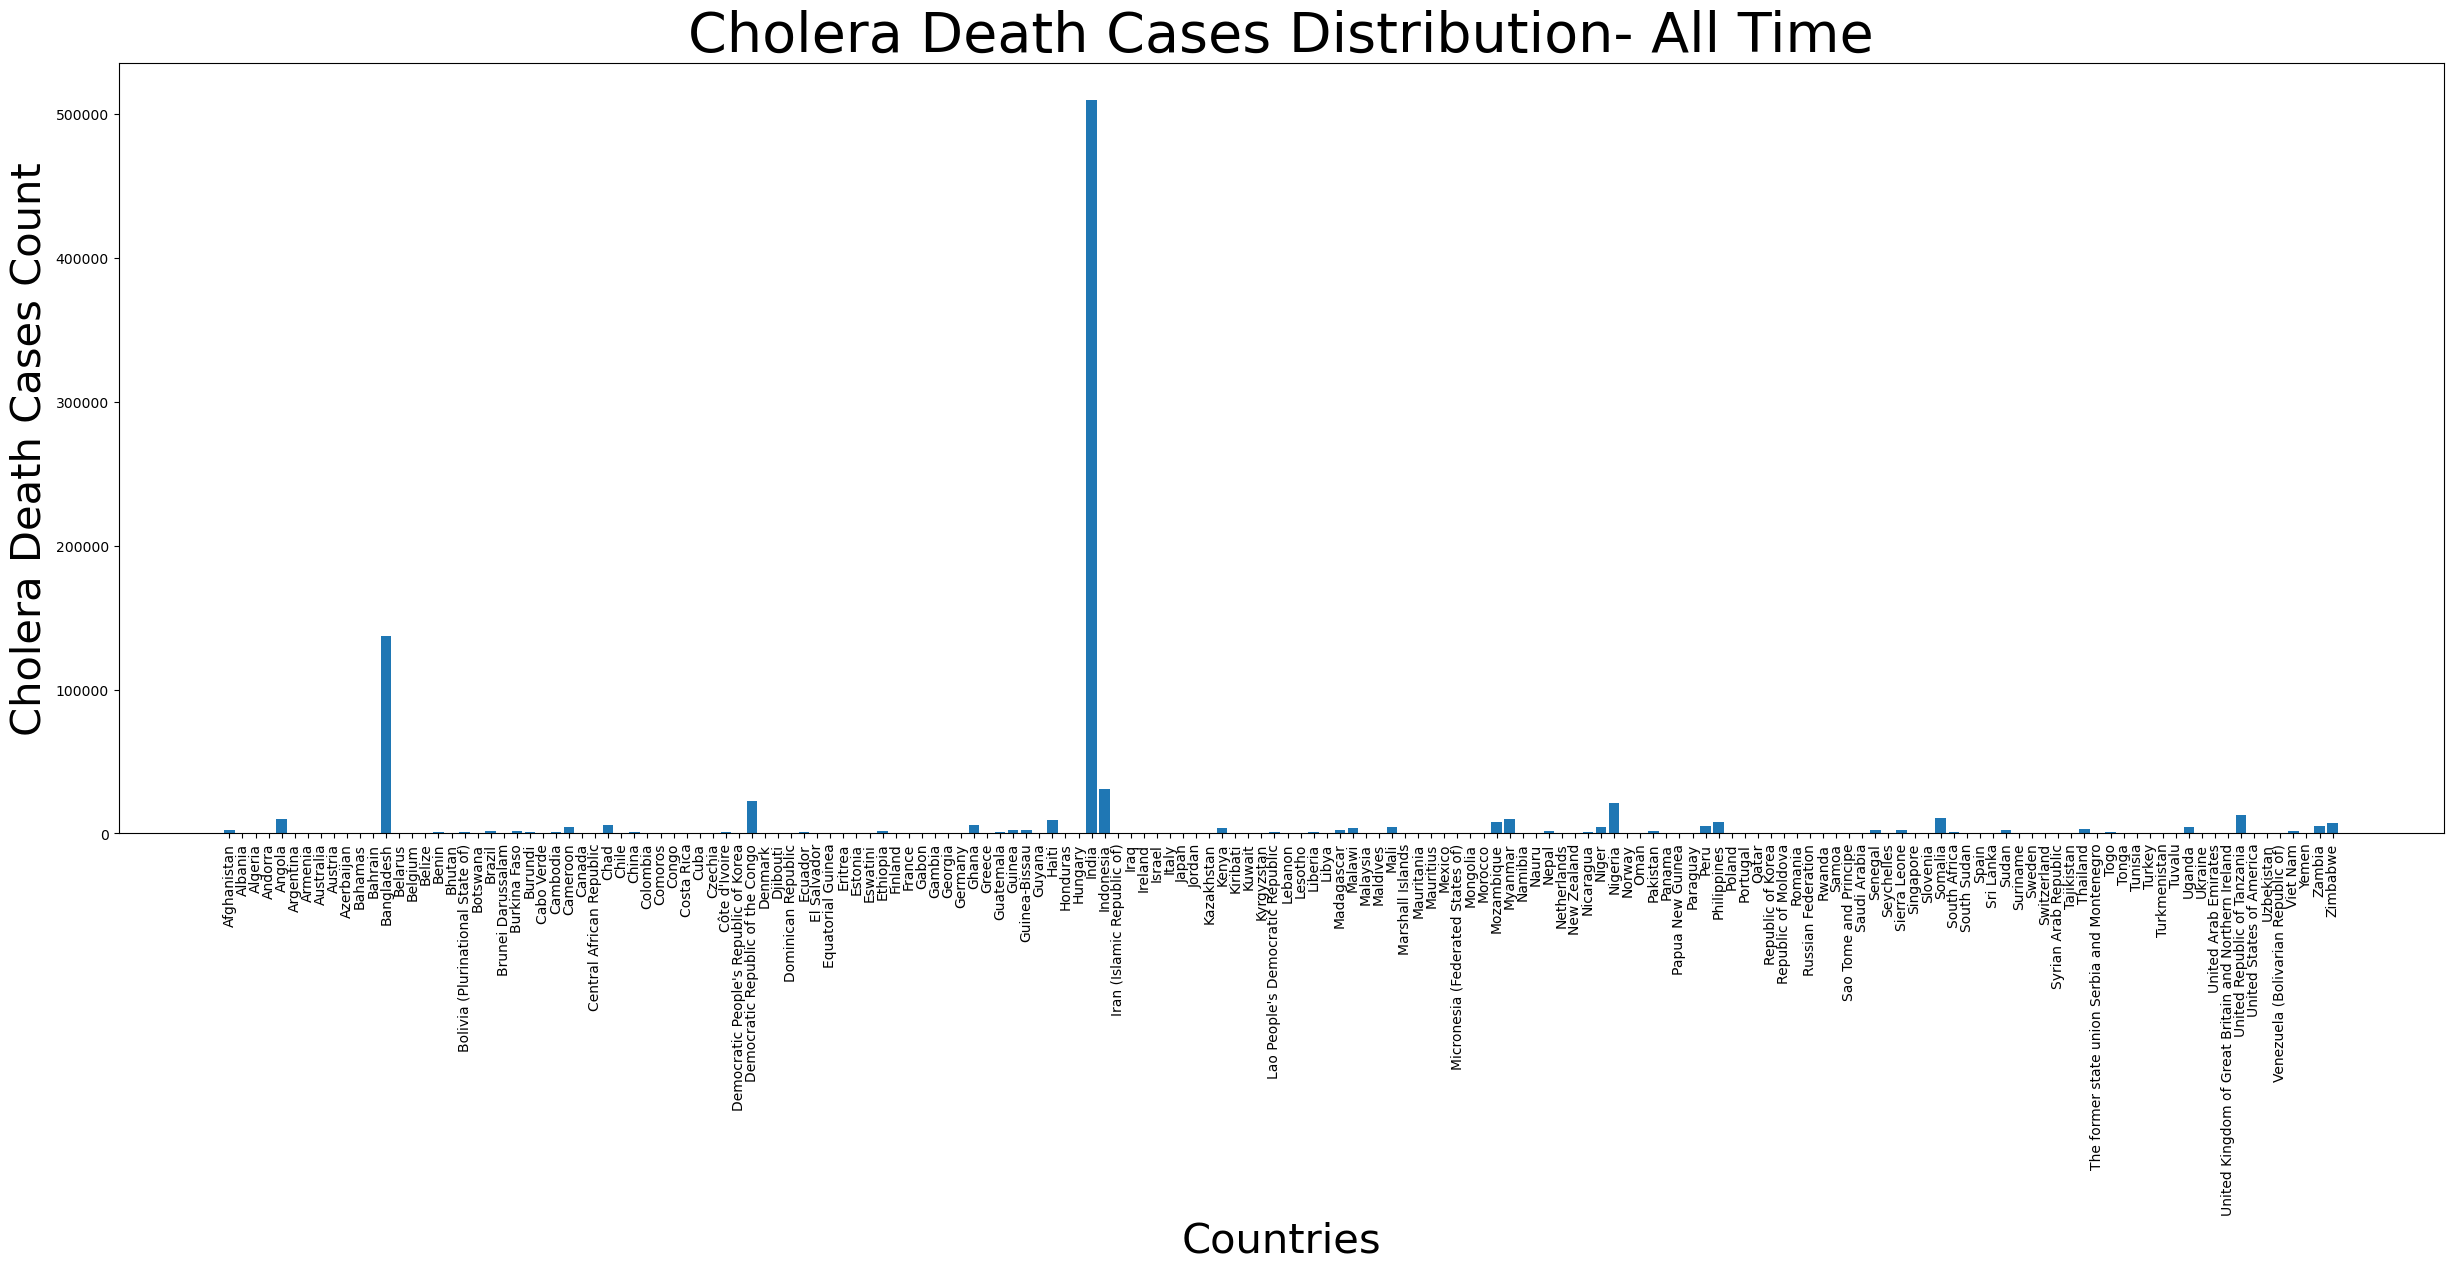

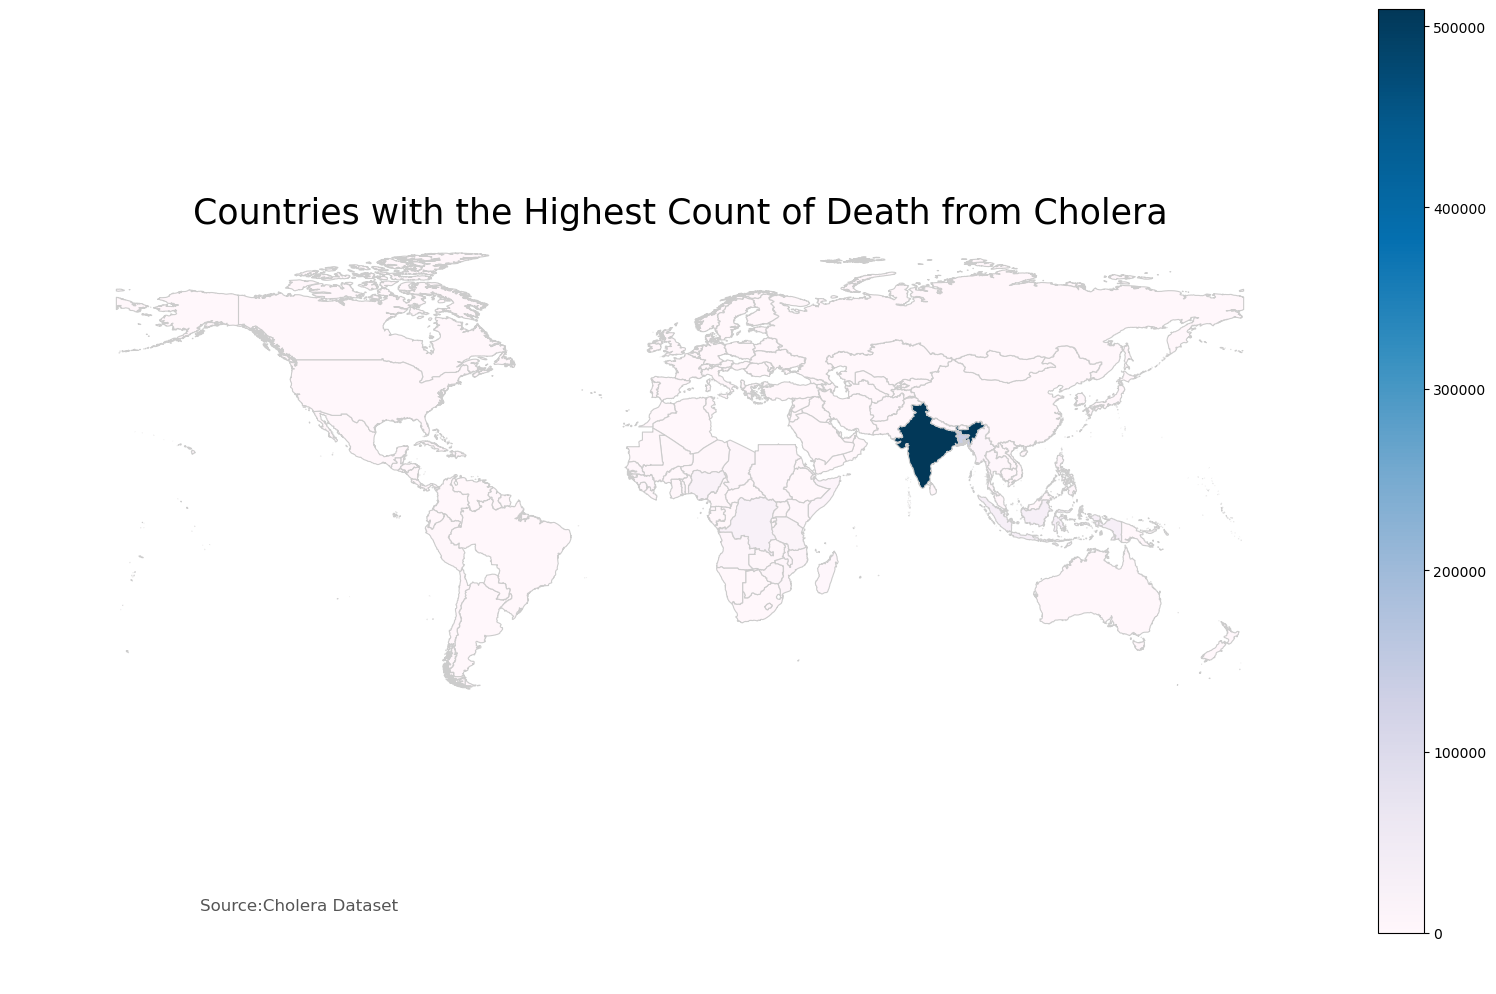

In [62]:
file_ctry_deaths = file.groupby(['Country']).apply(lambda x: (pd.to_numeric(x['Number of reported deaths from cholera'])).sum()).reset_index(name='Count of Deaths from Cholera')
print('The Number of Cholera Cases for the counties:\n', file_ctry_deaths)

plt.figure(figsize=(30, 10))
plt.bar(file_ctry_deaths['Country'], file_ctry_deaths['Count of Deaths from Cholera'])
plt.xlabel('Countries', size=30)
plt.ylabel('Cholera Death Cases Count', size=30)
plt.title('Cholera Death Cases Distribution- All Time', size=40)
plt.xticks(rotation=90)
plt.show()

merged = map_df.set_index('NAME').join(file_ctry_deaths.set_index('Country'))
variable = 'Count of Deaths from Cholera'
vmin, vmax = np.min(merged['Count of Deaths from Cholera']), np.max(merged['Count of Deaths from Cholera'])

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='PuBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Countries with the Highest Count of Death from Cholera', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


# Creating a "WHO Region vs Year Heatmap" for the Total Counts of Cases- Analysis of the Last 10 years

Text(0.5, 1.0, 'WHO Region vs Year Heatmap of Cholera Cases- in the last 10 years')

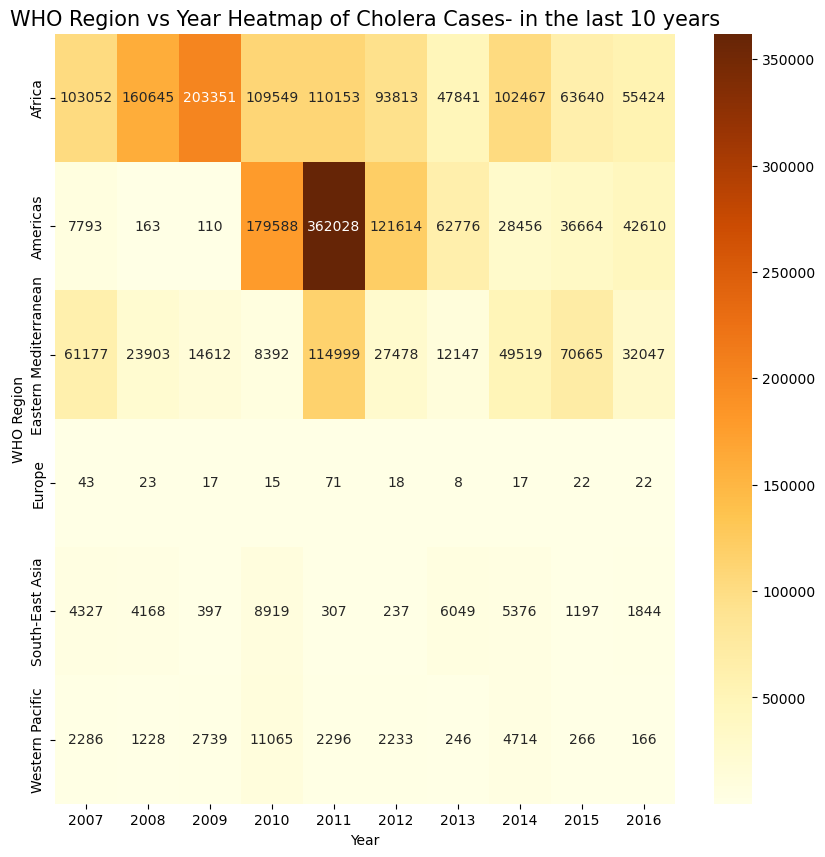

In [63]:
file_yr_region=ten_yr_case.groupby(['WHO Region','Year']).apply(lambda x:np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Count of Cholera Cases')
heatmap1_data = pd.pivot_table(file_yr_region, values='Count of Cholera Cases', 
                     index=['WHO Region'],columns='Year')
plt.figure(figsize=(10,10))
sns.heatmap(heatmap1_data,annot=True,fmt='.0f', cmap='YlOrBr').set_title('WHO Region vs Year Heatmap of Cholera Cases- in the last 10 years',size=15)

# Plotting the average fatality rate in the Nations over the years

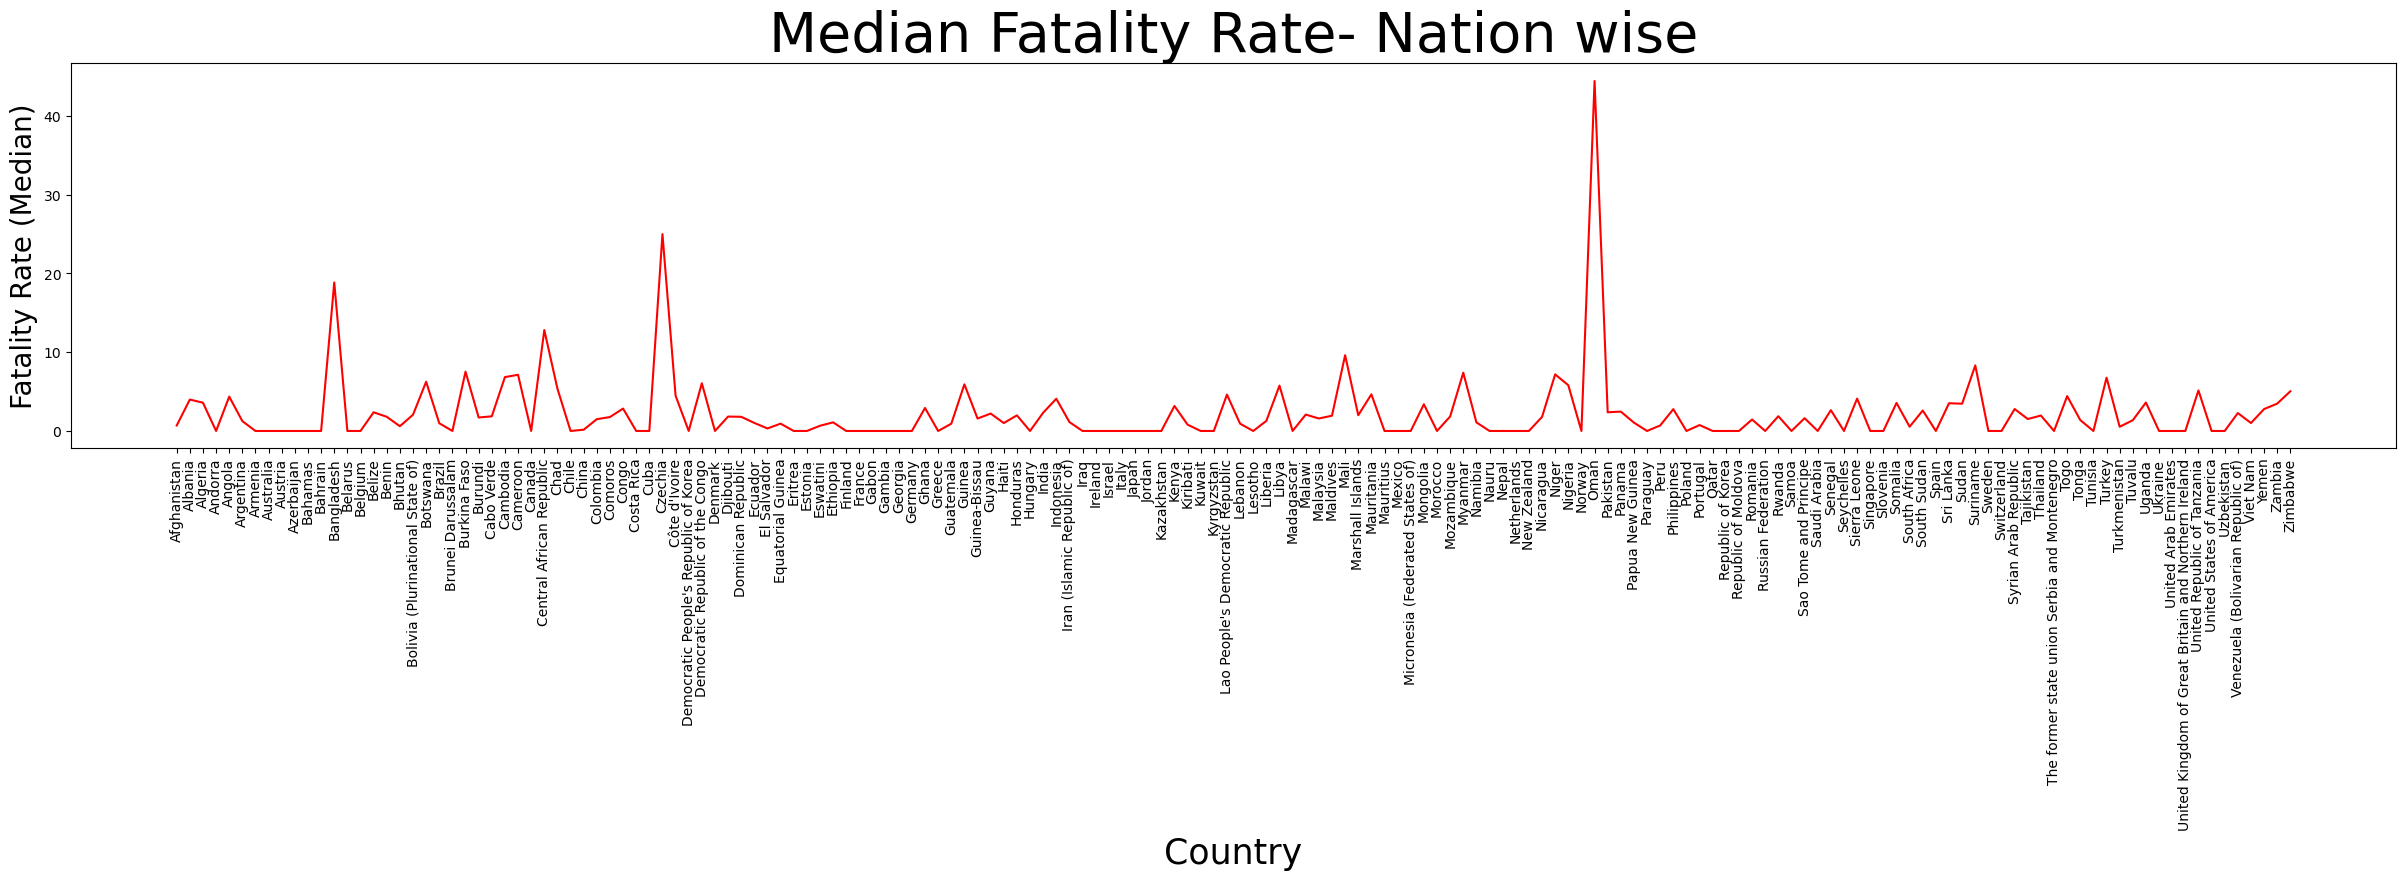

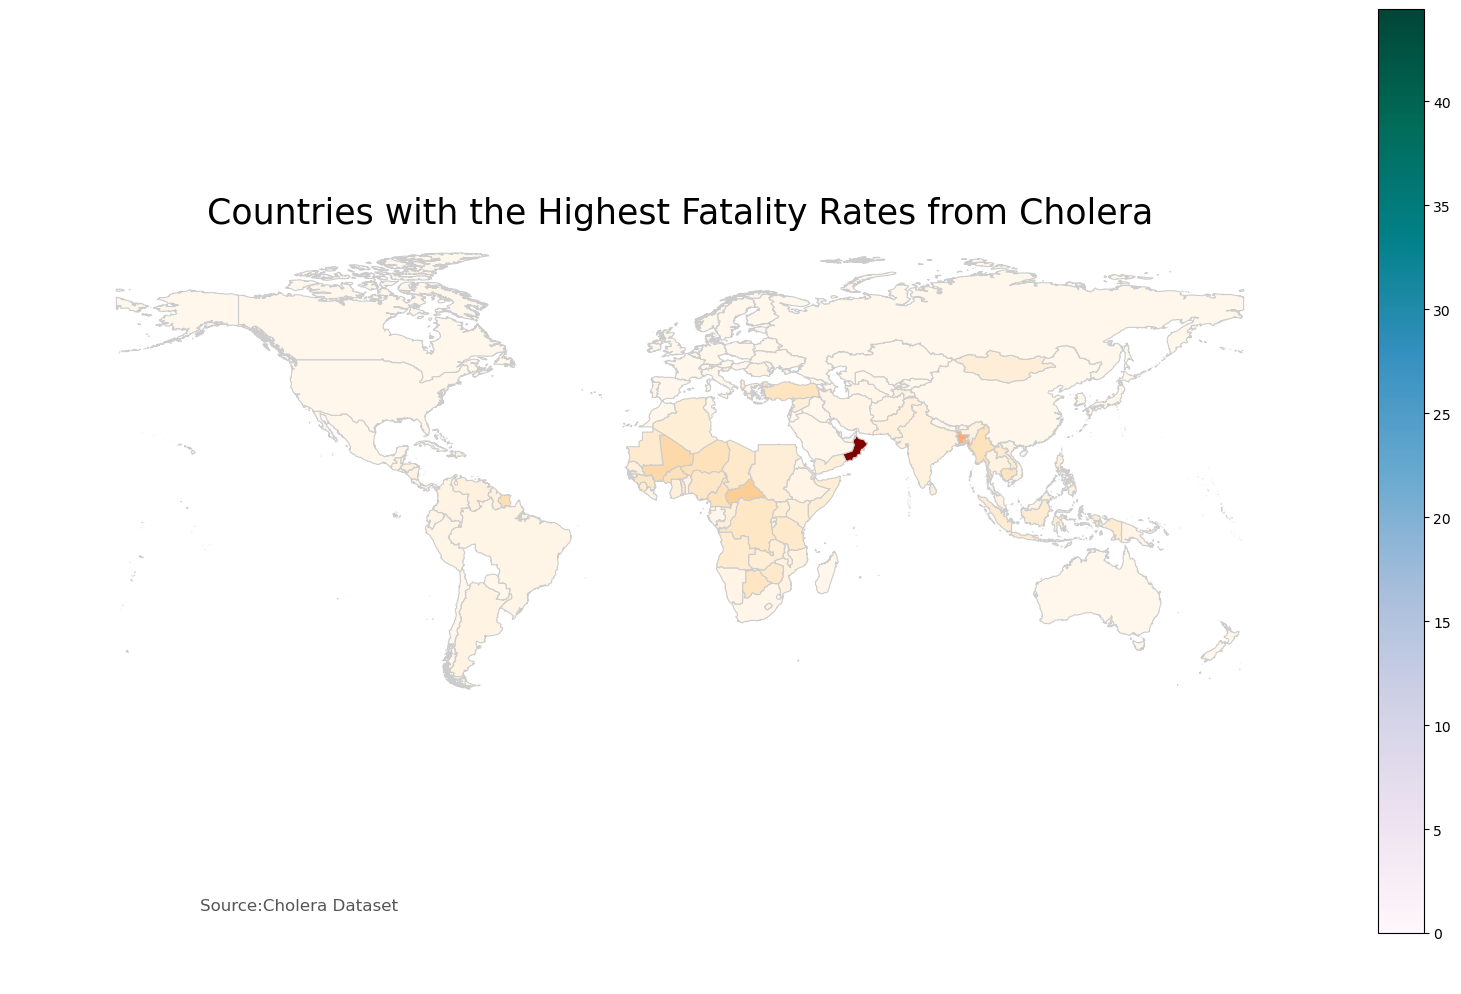

In [64]:
fat_ctry = file.groupby('Country').apply(lambda x: pd.to_numeric(x['Cholera case fatality rate']).median()).reset_index(name='Median Fatality')
fat_ctry.replace(np.NaN, 0, inplace=True)

plt.figure(figsize=(30, 5))
plt.plot(fat_ctry['Country'], fat_ctry['Median Fatality'], color='r')
plt.xlabel('Country', size=25)
plt.ylabel('Fatality Rate (Median)', size=20)
plt.title('Median Fatality Rate- Nation wise', size=40)
plt.xticks(rotation=90)

merged = map_df.set_index('NAME').join(fat_ctry.set_index('Country'))
variable = 'Median Fatality'
vmin, vmax = np.min(merged['Median Fatality']), np.max(merged['Median Fatality'])

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Countries with the Highest Fatality Rates from Cholera', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='PuBuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


# We will now be summarizing the overall data for 2 nations- One which has the highest counts in all time data, and the other having the highest counts in the past 10 years

# We are defining a function from where we shall be recieving the Counts Analysis for the particular country

In [69]:
def country_summary(country):
    country_file = file[file['Country'] == country]
    country_case_counts = country_file.groupby('Year').apply(lambda x: pd.to_numeric(x['Number of reported cases of cholera'])).reset_index(name='Total Cases of Cholera')
    country_death_counts = country_file.groupby('Year').apply(lambda x: pd.to_numeric(x['Number of reported deaths from cholera'])).reset_index(name='Total Deaths from Cholera')

    plt.plot(country_case_counts['Year'], country_case_counts['Total Cases of Cholera'])
    plt.plot(country_death_counts['Year'], country_death_counts['Total Deaths from Cholera'], color='r')
    plt.xlabel('Year')
    plt.ylabel('Total count numbers')
    plt.title('Analysis of Cholera Cases vs Death: {}'.format(country))
    plt.legend(['Total Cases of Cholera', 'Total Deaths from Cholera'])

    print('The Year {:.0f} has seen the maximum number of Cholera Cases: {:.0f}'.format(
        country_case_counts.loc[np.max(country_case_counts['Total Cases of Cholera'].idxmax())]['Year'],
        np.max(country_case_counts['Total Cases of Cholera'])))
    
    print('The Year {:.0f} has seen the maximum number of deaths due to Cholera: {:.0f}'.format(
        round(country_death_counts.loc[np.max(country_death_counts['Total Deaths from Cholera'].idxmax())]['Year']),
        round(np.max(country_death_counts['Total Deaths from Cholera']))))


The Year 1991 has seen the maximum number of Cholera Cases: 59478
The Year 1991 has seen the maximum number of deaths due to Cholera: 7654


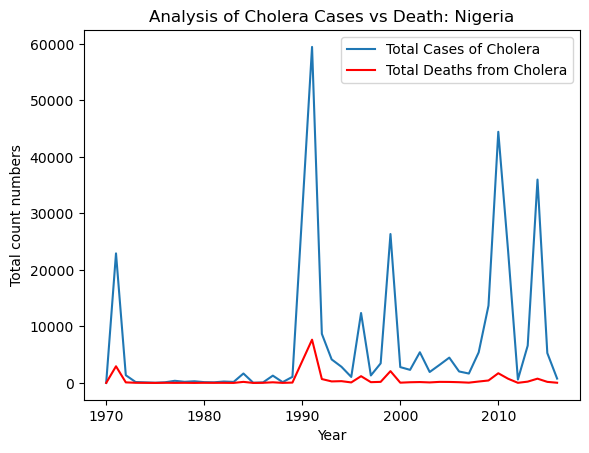

In [70]:
Nigerian_Data=country_summary('Nigeria')

The Year 1950 has seen the maximum number of Cholera Cases: 29809
The Year 1953 has seen the maximum number of deaths due to Cholera: 16904


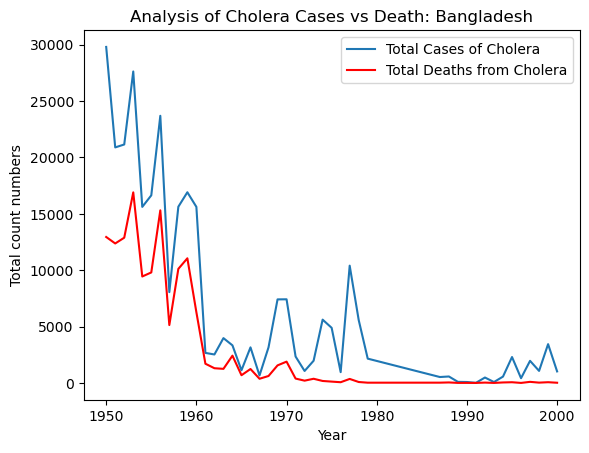

In [71]:
Bangladesh_Data=country_summary('Bangladesh')

The Year 2011 has seen the maximum number of Cholera Cases: 340311
The Year 2010 has seen the maximum number of deaths due to Cholera: 3990


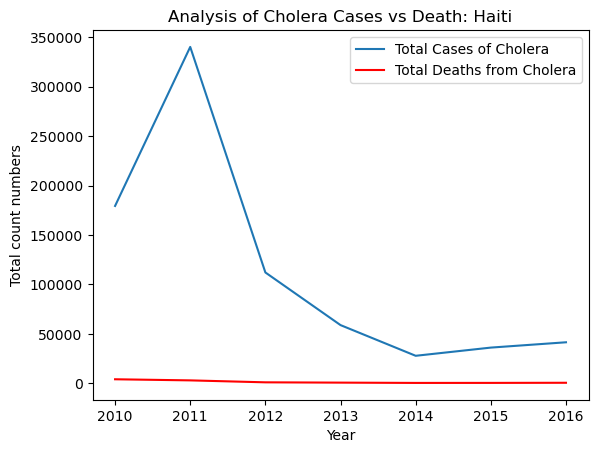

In [72]:
Haiti_Data=country_summary('Haiti')

# Machine Leanrning Model

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [74]:
# Loading dataset
file = pd.read_csv(r'C:\Users\Yusuf Nasir\OneDrive\Desktop\Zakiya\data.csv')

In [75]:
# Data Preprocessing
# Replace 'Unknown' values with 0
file.replace('Unknown', 0, regex=True, inplace=True)

# Clean specific columns (example for "Reported Cases" and "Reported Deaths")
file['Number of reported cases of cholera'] = pd.to_numeric(file['Number of reported cases of cholera'], errors='coerce').fillna(0)
file['Number of reported deaths from cholera'] = pd.to_numeric(file['Number of reported deaths from cholera'], errors='coerce').fillna(0)
file['Cholera case fatality rate'] = pd.to_numeric(file['Cholera case fatality rate'], errors='coerce').fillna(0)



In [114]:
# Encode categorical data like 'Country' and 'WHO Region' using LabelEncoder
le_country = LabelEncoder()
file['Country_encoded'] = le_country.fit_transform(file['Country'])

le_region = LabelEncoder()
file['Region_encoded'] = le_region.fit_transform(file['WHO Region'])

# Feature Engineering: Create some new features based on the existing data
file['Year'] = pd.to_datetime(file['Year'], format='%Y')
file['Month'] = file['Year'].dt.month
file['Case Fatality Rate'] = file['Number of reported deaths from cholera'] / (file['Number of reported cases of cholera'] + 1e-5)



# Create a binary target variable (1 = Potential outbreak, 0 = No outbreak)

In [77]:

file['Potential_Outbreak'] = (file['Number of reported cases of cholera'] > file['Number of reported cases of cholera'].quantile(0.75)).astype(int)

# Select Features and Target
features = ['Year', 'Month', 'Country_encoded', 'Region_encoded', 'Case Fatality Rate']
target = 'Potential_Outbreak'



In [112]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Extract useful date-related features from 'Month'


In [109]:
file['Month'] = pd.to_datetime(file['Month'], errors='coerce')
file['Year'] = file['Month'].dt.year
file['Month'] = file['Month'].dt.month


#  Encode categorical variables

In [ ]:

label_encoder = LabelEncoder()
file['Country_encoded'] = label_encoder.fit_transform(file['Country'])
file['Region_encoded'] = label_encoder.fit_transform(file['WHO Region'])


# Select features (X) and target (y)


In [ ]:
X = file[['Year', 'Country_encoded', 'Region_encoded', 'Month', 'Case Fatality Rate']]
y = file['Potential_Outbreak']  # Assuming this is the target variable


# Train-Test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Random Forest model


In [111]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


# Model Accuracy

In [113]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7975951903807615


In [108]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
predictions = rf_model.predict(X_test)
scores = accuracy_score(y_test, predictions)
scores

0.7975951903807615

In [92]:
predictions

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,